<a href="https://colab.research.google.com/github/smdp2000/from-SCRATCH/blob/master/MNIST_Classification_Using_Softmax_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000,)
(10000, 28, 28)


In [ ]:
#flattening
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


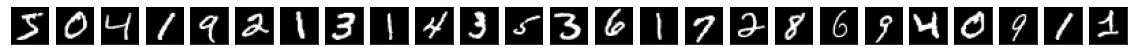

In [ ]:
import matplotlib.pyplot as plt

n = 25  # how many digits we will display
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


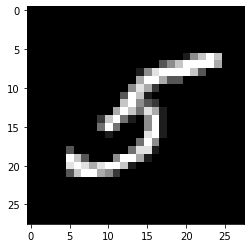

In [ ]:
#NORMALIZE
XX_train = x_train.astype('float32') / 255.
XX_test = x_test.astype('float32') / 255.
plt.imshow(XX_train[35].reshape(28,28))

In [ ]:
#create one hot encoding for 10 classes
Y_train, Y_test = np.zeros((y_train.shape[0], 10)), np.zeros((y_test.shape[0], 10))
for i in range(len(y_train)):
  Y_train[i, y_train[i]] = 1;

for k in range(len(y_test)):
  Y_test[k, y_test[k]] = 1;

In [ ]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [ ]:

print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [ ]:
def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=0, keepdims=True)

In [ ]:
def deep_initialize_parameters(input_dim):
    np.random.seed(1)
    parameters = {}
    parameters['W'] = np.random.randn(10,input_dim)/ np.sqrt(input_dim)# *0.01
    parameters['b'] = np.zeros((10, 1))
    return parameters

In [ ]:
def forward(parameters, X):
    w = parameters['W']
    b = parameters['b']
    Z = np.dot(w,X) + b
    A = softmax(Z)
    return A

In [ ]:
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-9))#add epsilon so it wont get zero
    return cost

In [ ]:
def backprop(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db

In [ ]:
def optimise(parameters, X, Y, num_iterations, l_rate):
    costs = []
    for i in range(num_iterations):
        A = forward(parameters, X)
        cost = compute_cost(A, Y)
        dw, db = backprop(X, Y, A)

        parameters['W'] = parameters['W'] - l_rate * dw.T
        parameters['b'] = parameters['b'] - l_rate * db.T

        if i % 100 == 0:
            print('Cost on {} iteration: Cost: {}, Normalised Weight: {}, Bias: {}'.format(i, cost, np.linalg.norm(dw), db))
        
        costs.append(cost)
    return parameters, costs

In [ ]:

def predict(parameters, X, Y):
    w = parameters['W']
    print(w.shape,X.shape)
    probs = forward(parameters,X)
    y_hat = np.argmax(probs, axis=0)
    Y = np.argmax(Y, axis=0)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [ ]:

def model(input_dim, X_train, Y_train, num_interation, l_rate):
    parameters = deep_initialize_parameters(input_dim)
    parameters, costs = optimise(parameters, X_train, Y_train, num_interation, l_rate)
    return parameters, costs

In [ ]:
parameters, costs = model(XX_train.shape[0], XX_train, Y_train, 1000, 0.1)

Cost on 0 iteration: Cost: 2.4009700231956943, Normalised Weight: 1.1287216477550395, Bias: -8.038014698286134e-18
Cost on 100 iteration: Cost: 0.6148967910858434, Normalised Weight: 0.14719106976423135, Bias: 2.782959048393726e-18
Cost on 200 iteration: Cost: 0.4940638504940253, Normalised Weight: 0.08289892632127636, Bias: 2.3684757858670007e-19
Cost on 300 iteration: Cost: 0.4448066744224885, Normalised Weight: 0.05962651671448768, Bias: 9.473903143468003e-19
Cost on 400 iteration: Cost: 0.41659904304841805, Normalised Weight: 0.04738475538733082, Bias: -2.960594732333751e-20
Cost on 500 iteration: Cost: 0.39778176583717, Normalised Weight: 0.03974575547309855, Bias: -5.921189464667502e-20
Cost on 600 iteration: Cost: 0.38408313795924465, Normalised Weight: 0.0344817368637252, Bias: 2.960594732333751e-19
Cost on 700 iteration: Cost: 0.3735307179902765, Normalised Weight: 0.030610569900839678, Bias: 4.440892098500626e-19
Cost on 800 iteration: Cost: 0.3650740550635267, Normalised Wei

In [ ]:
print("Train Accuracy: ",predict(parameters, XX_train, Y_train))

(10, 784) (784, 60000)
Train Accuracy:  90.29833333333333


In [ ]:
print("Test Accuracy: ",predict(parameters, XX_test, Y_test))

(10, 784) (784, 10000)
Test Accuracy:  90.86999999999999


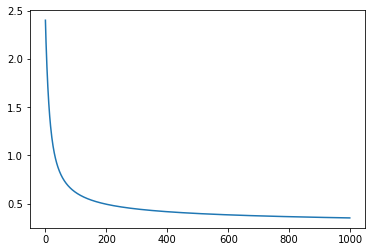

In [ ]:
plt.plot(range(len(costs)),costs)

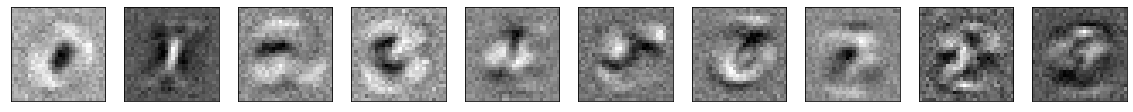

In [ ]:
#image of W
n = 10
plt.figure(figsize=(20, 6))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(parameters['W'][i,:].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()